In [2]:
from pathlib import Path
import sys
import matplotlib.pyplot as plt

import iotbx.reflection_file_reader as cif_input

sys.path.append(str(Path(Path.home(), "Documents/xray/src")))
from miller_ops import get_miller_array
sys.path.append(str(Path(Path.home(), "Documents/xray/data/cifs/scripts")))
from generate_fmodel import write_cif, get_status_array

In [3]:
cif_names = ["7mhl", "7mhm"]
n_cif = len(cif_names)
cif_dir = Path(Path.home(), "Documents/xray/dev/39_bench_ensemble/data/cifs")

In [4]:
all_f_obs_arr = list()

for cif_name in cif_names:
    cif_file = Path(cif_dir, "{}.cif".format(cif_name))
    f_obs_arr = get_miller_array(
        f_obs_file=cif_file,
        label="_refln.F_meas_au"
    )
    all_f_obs_arr.append(f_obs_arr)

    status_arr = get_miller_array(
        f_obs_file=cif_file,
        label="_refln.status"
    )
    flags_arr = status_arr.customized_copy(data=status_arr.data()=="f")


In [5]:
all_matched_f_obs = list()

for f_obs_arr in all_f_obs_arr:
    matched_f_obs = list()
    for index in all_f_obs_arr[0].indices():
        f_ob = f_obs_arr.at_first_index(f_obs_arr.data(), index)
        matched_f_obs.append(f_ob)

    all_matched_f_obs.append(matched_f_obs)



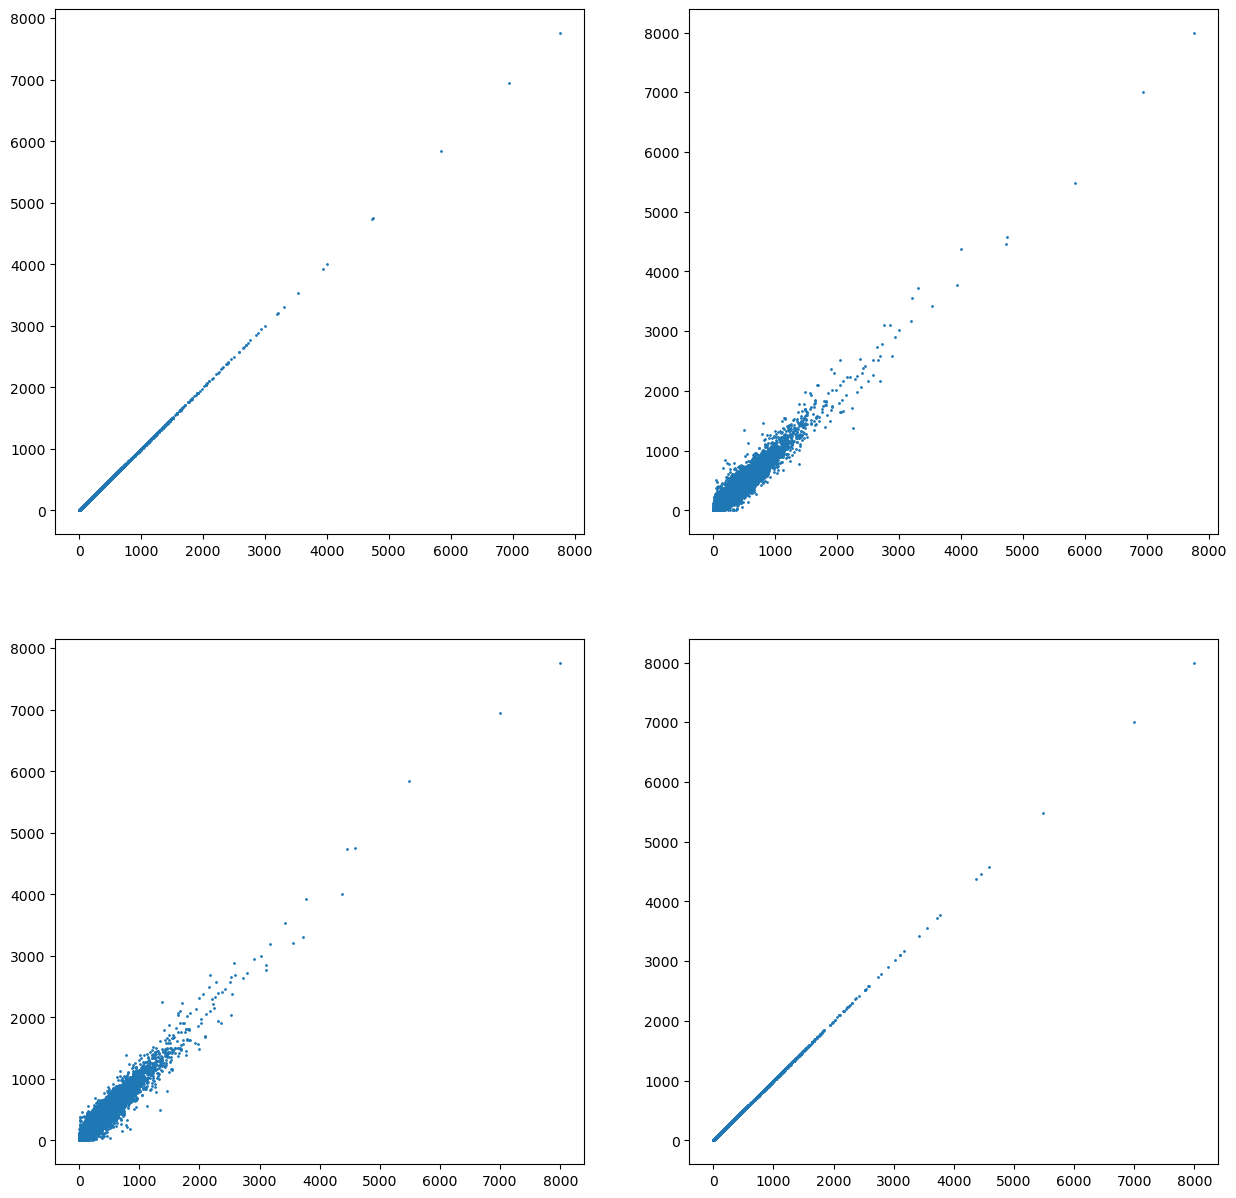

In [6]:
fig, axes = plt.subplots(n_cif, n_cif, figsize=(15, 15))

for i in range(n_cif):
    for j in range(n_cif):
        axes[i,j].scatter(all_matched_f_obs[i], all_matched_f_obs[j], s=1)

plt.savefig(Path(Path.home(), "Desktop/fig.png"))